<a href="https://colab.research.google.com/github/harishvo6/Shinkansen_Travel_Experience/blob/main/Shinkansen_Travel_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# General Settings
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# Import lib to load data from GDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the dataset
travel_df = pd.read_csv(
    "/content/drive/MyDrive/Python Course/Traveldata_train_(2).csv"
)
# Inspect data
travel_df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [ ]:
travel_df.shape


(94379, 9)

In [ ]:
# Reading the dataset
survey_df = pd.read_csv(
    "/content/drive/MyDrive/Python Course/Surveydata_train_(2).csv"
)
# Inspect data
survey_df.head ()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
survey_df.shape

(94379, 17)

In [ ]:
# Merge the dataframes on 'ID'
merged_df = pd.merge(travel_df, survey_df, on='ID')
merged_df.head()


,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [ ]:
#finding the number of missing values in each column
print(merged_df.isnull().sum().sort_values(ascending=False))

Type_Travel                9226
Customer_Type              8951
Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Arrival_Delay_in_Mins       357
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Gender                       77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Departure_Delay_in_Mins      57
Age                          33
Onboard_Wifi_Service         30
Platform_Location            30
Onboard_Entertainment        18
Cleanliness                   6
Online_Boarding               6
ID                            0
Travel_Class                  0
Travel_Distance               0
Overall_Experience            0
Seat_Class                    0
dtype: int64


In [ ]:
#imputing missing values with median for numerical features
num_cols_to_impute = ['Age', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins']
for col in num_cols_to_impute:
    merged_df[col].fillna(merged_df[col].median(), inplace=True)


In [ ]:
merged_df['Age'].tail()

,Age
94374,32.0
94375,44.0
94376,63.0
94377,16.0
94378,54.0


In [ ]:
#imputing missing values with mode for categorical features
cat_cols_to_impute = [
    'Type_Travel', 'Customer_Type', 'Arrival_Time_Convenient', 'Catering',
    'Onboard_Service', 'Baggage_Handling', 'Online_Support', 'Legroom',
    'CheckIn_Service', 'Gender', 'Ease_of_Online_Booking', 'Seat_Comfort',
    'Onboard_Wifi_Service', 'Platform_Location', 'Onboard_Entertainment',
    'Cleanliness', 'Online_Boarding'
]

for col in cat_cols_to_impute:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)


In [ ]:
print("Remaining Missing Values:\n", merged_df.isnull().sum().sort_values(ascending=False))


Remaining Missing Values:
 ID                         0
Gender                     0
Customer_Type              0
Age                        0
Type_Travel                0
Travel_Class               0
Travel_Distance            0
Departure_Delay_in_Mins    0
Arrival_Delay_in_Mins      0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64


In [ ]:
# Checking the number of unique values in each column
merged_df.nunique()

,0
ID,94379
Gender,2
Customer_Type,2
Age,75
Type_Travel,2
Travel_Class,2
Travel_Distance,5210
Departure_Delay_in_Mins,437
Arrival_Delay_in_Mins,434
Overall_Experience,2


In [ ]:
# Dropping the columns
merged_df = merged_df.drop(['ID'], axis = 1)

In [ ]:
# Checking the number of unique values in each column
merged_df.nunique()

,0
Gender,2
Customer_Type,2
Age,75
Type_Travel,2
Travel_Class,2
Travel_Distance,5210
Departure_Delay_in_Mins,437
Arrival_Delay_in_Mins,434
Overall_Experience,2
Seat_Comfort,6


In [ ]:
# Check distribution of the target column
print(merged_df['Overall_Experience'].value_counts(normalize=True))


Overall_Experience
1    0.546658
0    0.453342
Name: proportion, dtype: float64


In [ ]:

# Split into numerical and categorical for later processing
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Overall_Experience']
Categorical columns: ['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']


## Exploratory Data Analysis

Univariate analysis of numerical columns

In [ ]:
merged_df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Age,94379.0,39.419850,15.113993,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94379.0,14.638246,38.128961,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94379.0,14.948463,38.377695,0.0,0.0,0.0,13.0,1584.0
Overall_Experience,94379.0,0.546658,0.497821,0.0,0.0,1.0,1.0,1.0


* The average Age in this data set is around 39 years. It has a good distribution from 7 to 85 years. With 50% of the entries aged 40years or less
* half or below half of the people traveled <= 1923 miles.
* The difference between third quartile and the max value is notably huge for both departure and Arrival delays indicating strong outliers


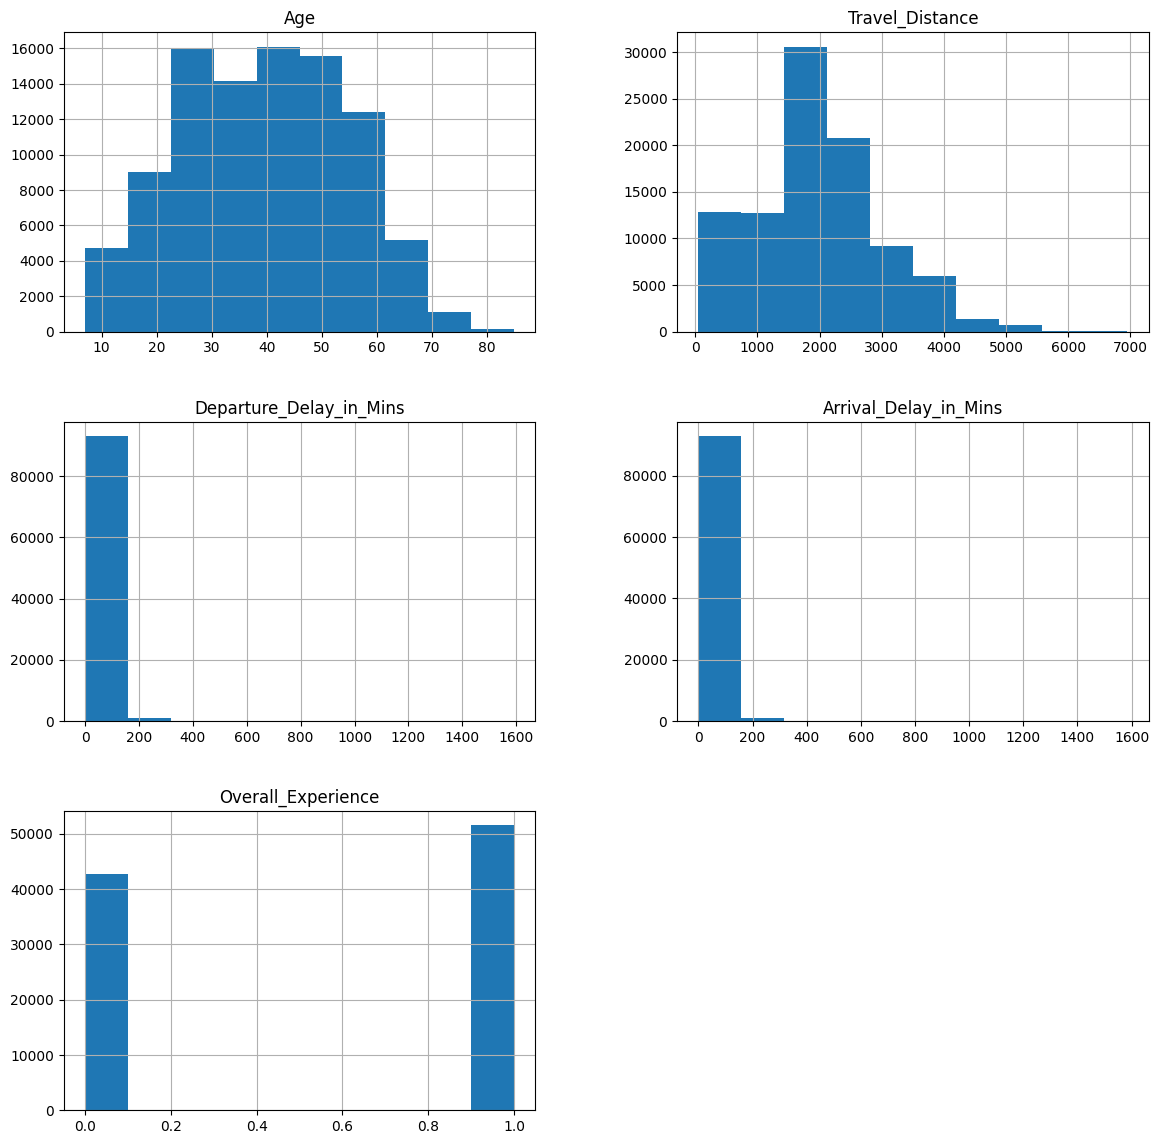

In [ ]:
# Creating histograms
merged_df[numerical_cols].hist(figsize = (14, 14))

plt.show()

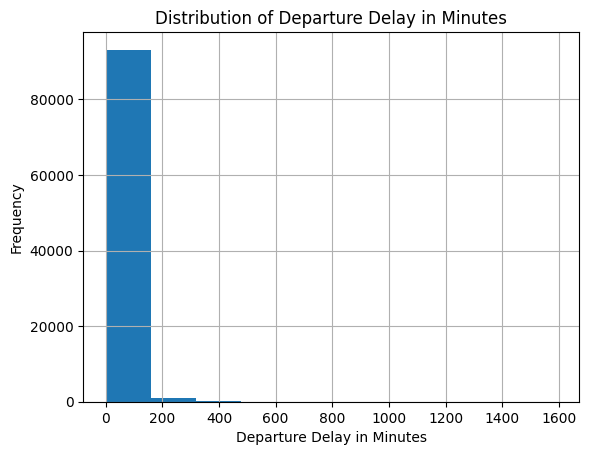

In [ ]:
merged_df['Departure_Delay_in_Mins'].hist()
plt.xlabel('Departure Delay in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Departure Delay in Minutes')
plt.show()

In [ ]:
# Iterate over categorical columns
for i in merged_df[categorical_cols]:
    # Inspect proportion
    print(merged_df[i].value_counts(normalize = True))
    print('*' * 40)

Gender
Female    0.507443
Male      0.492557
Name: proportion, dtype: float64
****************************************
Customer_Type
Loyal Customer       0.834656
Disloyal Customer    0.165344
Name: proportion, dtype: float64
****************************************
Type_Travel
Business Travel    0.718836
Personal Travel    0.281164
Name: proportion, dtype: float64
****************************************
Travel_Class
Eco         0.522807
Business    0.477193
Name: proportion, dtype: float64
****************************************
Seat_Comfort
Acceptable           0.224828
Needs Improvement    0.221935
Good                 0.218216
Poor                 0.160894
Excellent            0.137435
Extremely Poor       0.036692
Name: proportion, dtype: float64
****************************************
Seat_Class
Green Car    0.502601
Ordinary     0.497399
Name: proportion, dtype: float64
****************************************
Arrival_Time_Convenient
Good                 0.302016
Excellent   

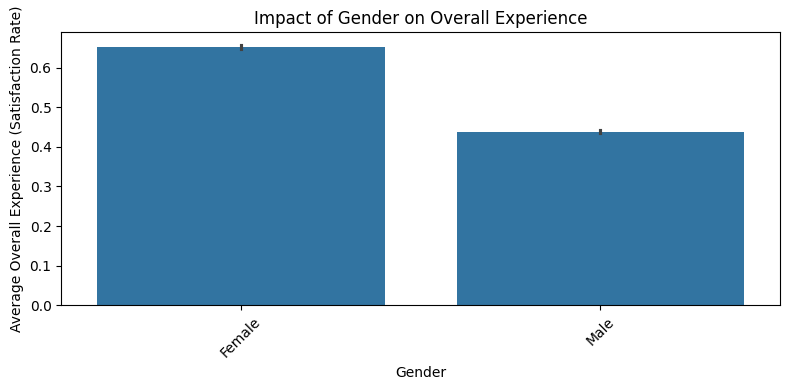

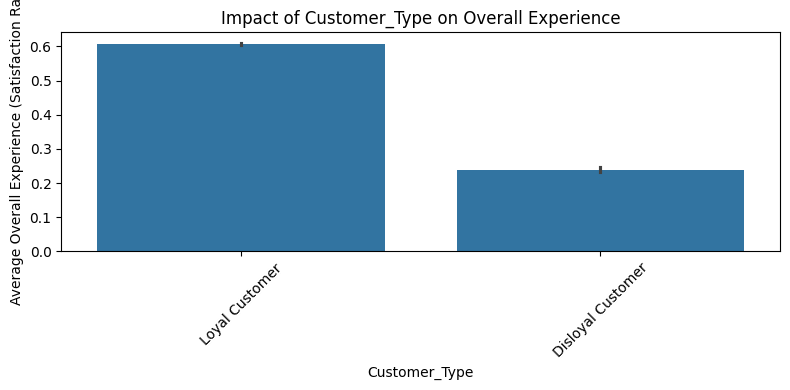

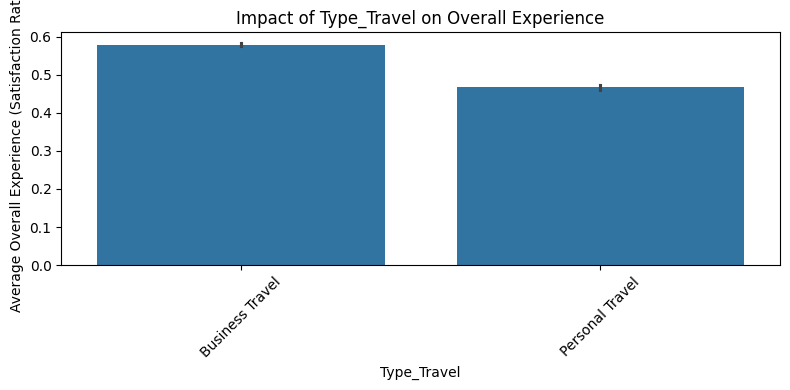

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Enable inline plots if you're in a Jupyter/Colab notebook
%matplotlib inline

# Loop through all categorical columns
for col in categorical_cols[:3]:
    if col not in merged_df.columns or col == 'Overall_Experience':
        continue

    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='Overall_Experience', data=merged_df, estimator=lambda x: sum(x)/len(x))
    plt.xticks(rotation=45)
    plt.ylabel('Average Overall Experience (Satisfaction Rate)')
    plt.title(f'Impact of {col} on Overall Experience')
    plt.tight_layout()
    plt.show()


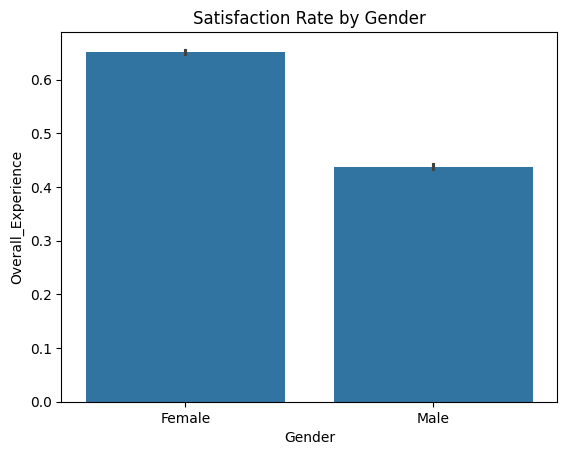

In [ ]:
sns.barplot(x='Gender', y='Overall_Experience', data=merged_df, estimator=lambda x: sum(x)/len(x))
plt.title('Satisfaction Rate by Gender')
plt.show()

In [ ]:
merged_df.head()


,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,Female,Loyal Customer,52.0,Business Travel,Business,272,0.0,5.0,0,Needs Improvement,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,Poor,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,Needs Improvement,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,Acceptable,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,Acceptable,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


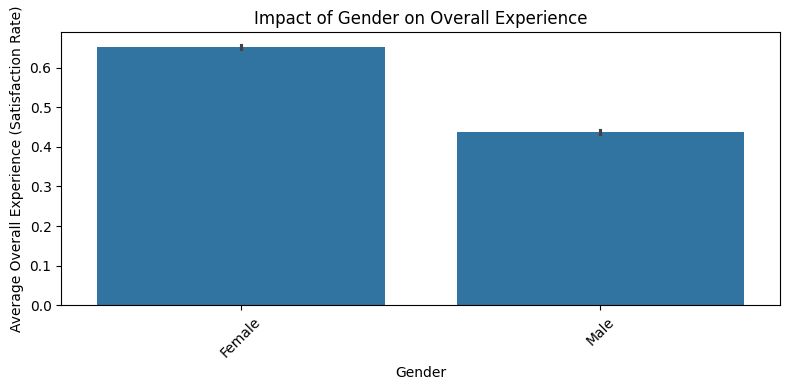

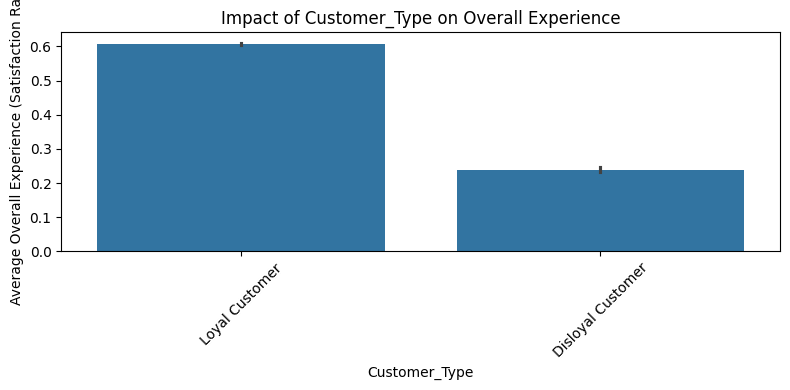

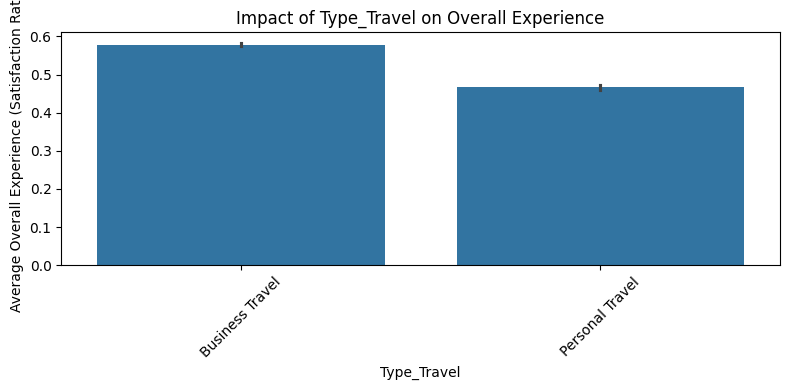

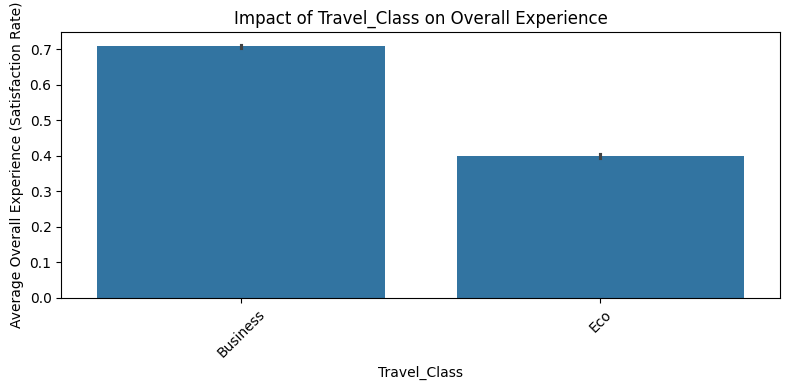

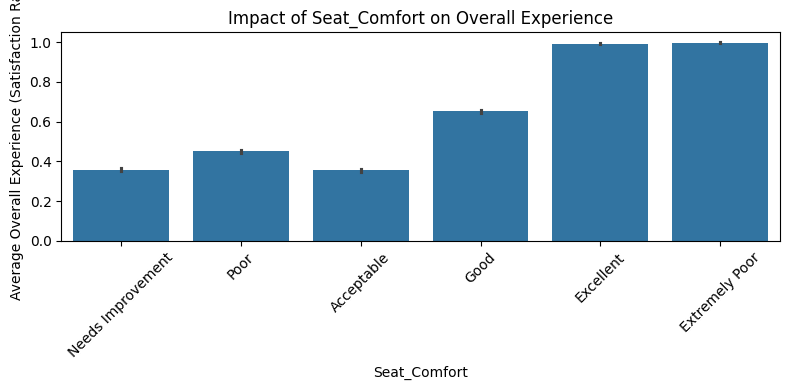

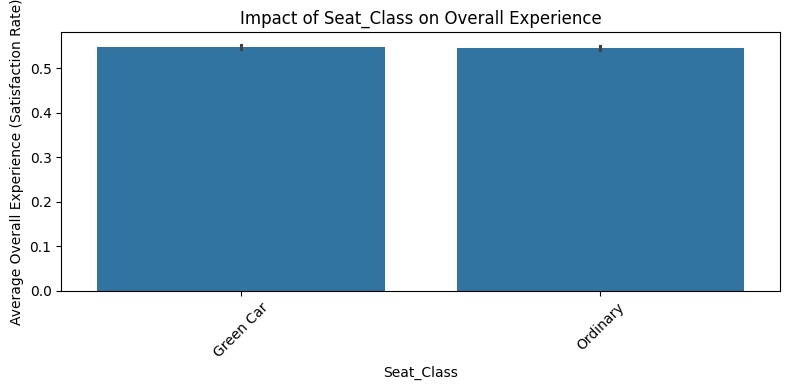

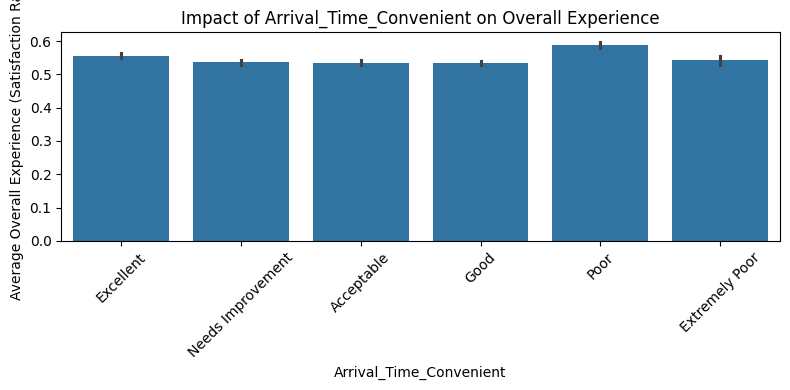

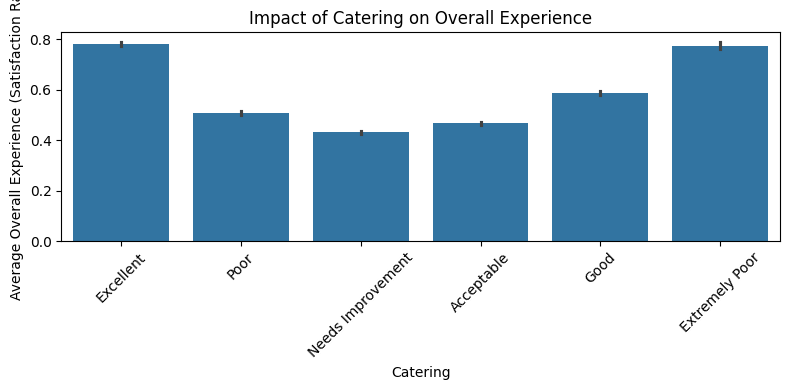

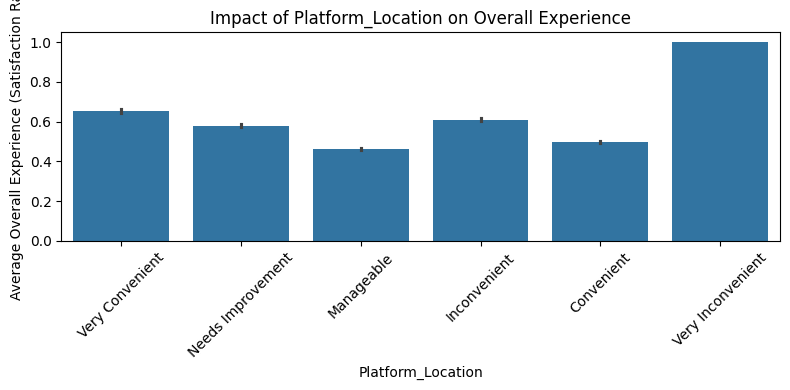

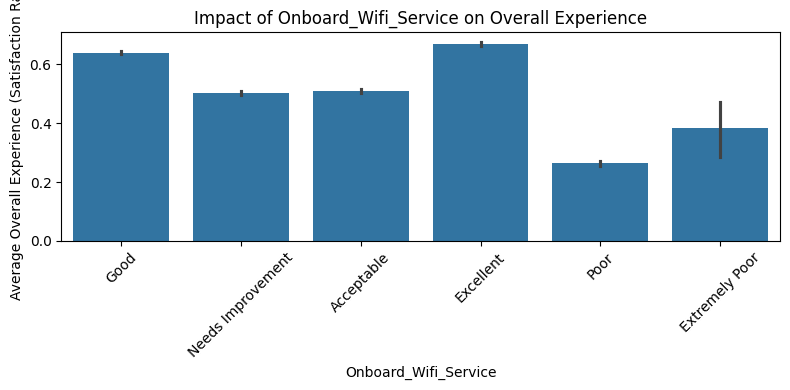

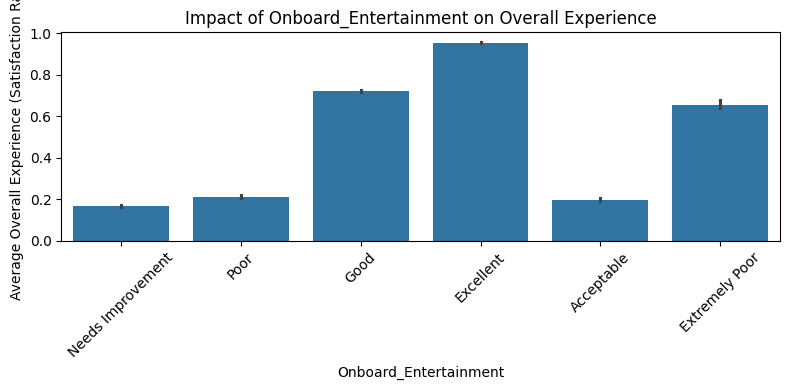

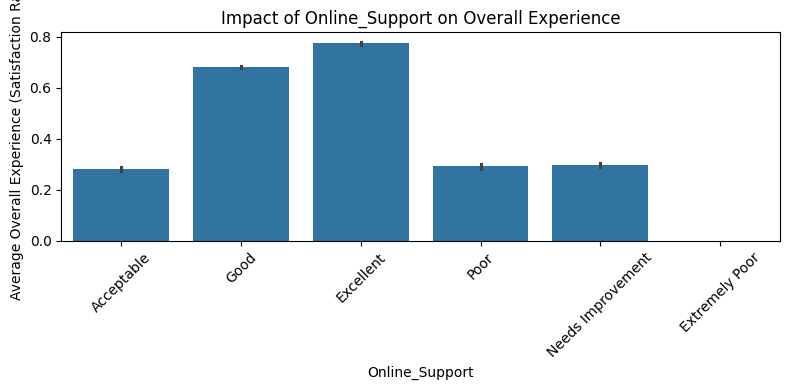

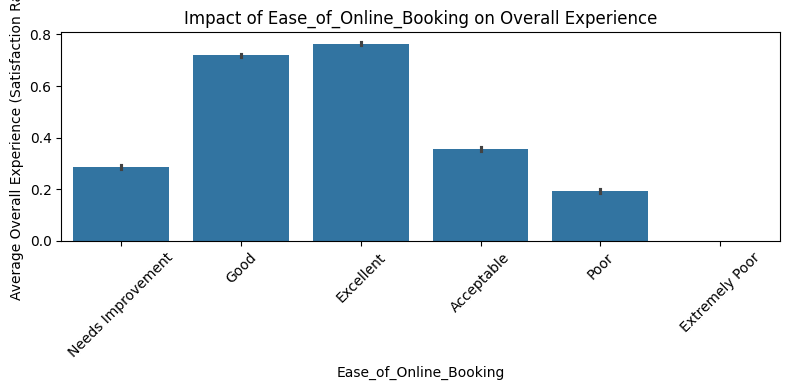

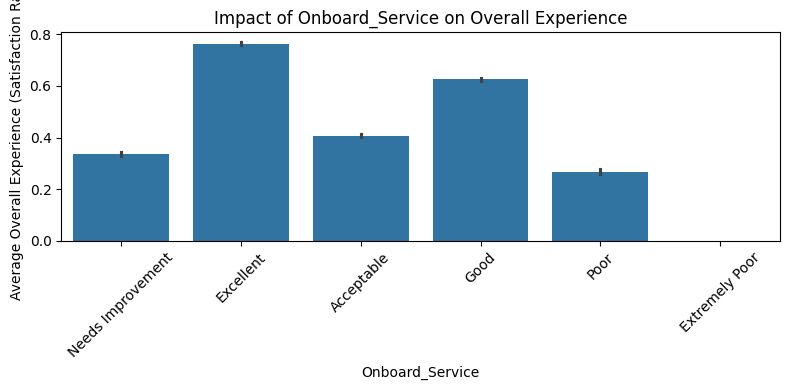

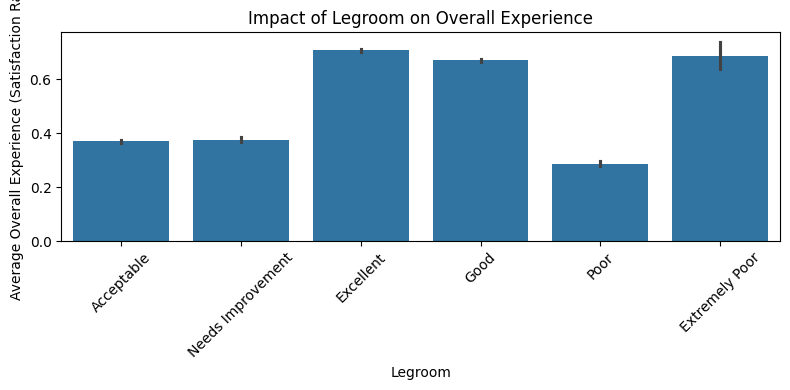

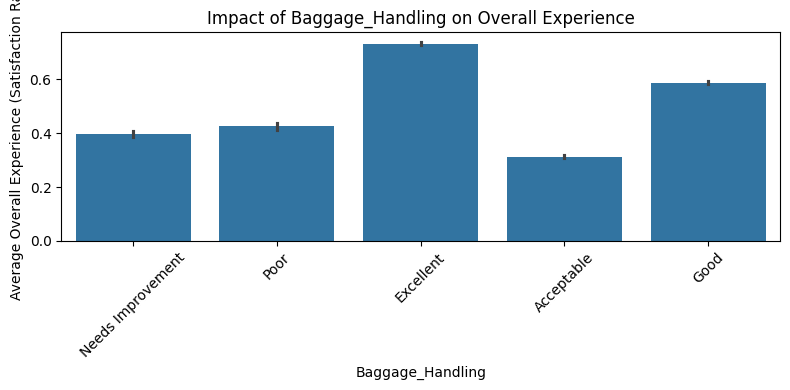

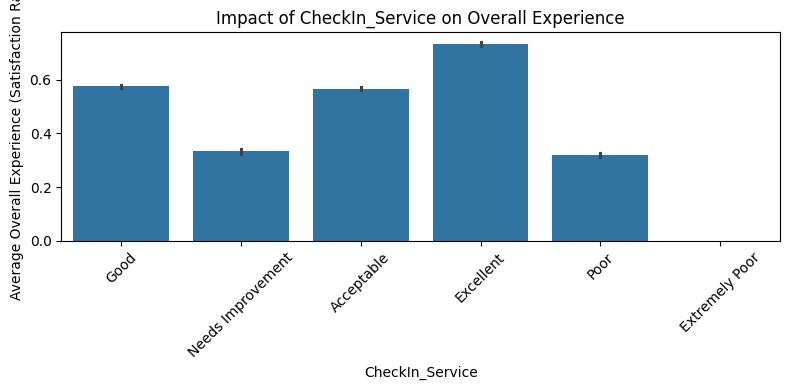

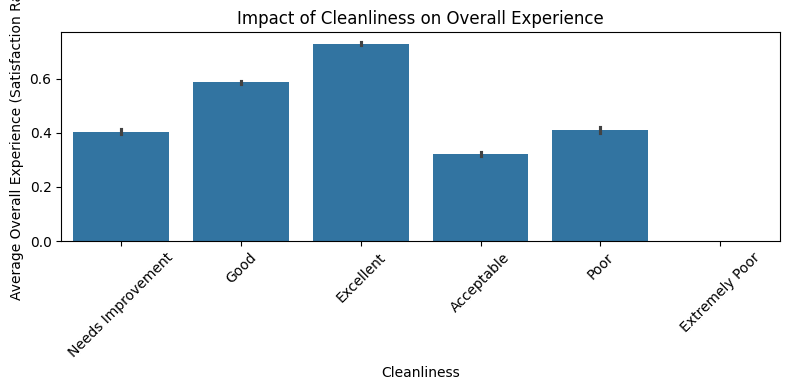

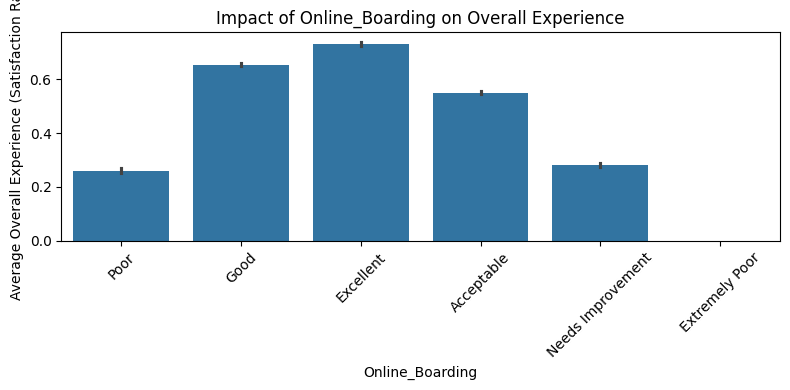

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Enable inline plots if you're in a Jupyter/Colab notebook
%matplotlib inline

# Loop through all categorical columns
for col in categorical_cols:
    if col not in merged_df.columns or col == 'Overall_Experience':
        continue

    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='Overall_Experience', data=merged_df, estimator=lambda x: sum(x)/len(x))
    plt.xticks(rotation=45)
    plt.ylabel('Average Overall Experience (Satisfaction Rate)')
    plt.title(f'Impact of {col} on Overall Experience')
    plt.tight_layout()
    plt.show()


In [ ]:
merged_df['Seat_Comfort'].value_counts()


,count
Seat_Comfort,
Acceptable,21219
Needs Improvement,20946
Good,20595
Poor,15185
Excellent,12971
Extremely Poor,3463


In [ ]:
# Ensure you already have this list of categorical columns
# If not, extract them like this:
categorical_cols = merged_df.select_dtypes(include='object').columns.tolist()

# Remove ID or any column you don’t want in the comparison
categorical_cols = [col for col in categorical_cols if col not in ['ID']]

# Loop through each categorical column and show crosstab
for col in categorical_cols:
    print(f"\nCrosstab: {col} vs Overall_Experience")
    ct = pd.crosstab(index=merged_df[col],
                     columns=merged_df['Overall_Experience'],
                     rownames=[col],
                     colnames=['Overall_Experience'])
    display(ct)



Crosstab: Gender vs Overall_Experience


Overall_Experience,0,1
Gender,,
Female,16675,31217
Male,26111,20376



Crosstab: Customer_Type vs Overall_Experience


Overall_Experience,0,1
Customer_Type,,
Disloyal Customer,11869,3736
Loyal Customer,30917,47857



Crosstab: Type_Travel vs Overall_Experience


Overall_Experience,0,1
Type_Travel,,
Business Travel,28627,39216
Personal Travel,14159,12377



Crosstab: Travel_Class vs Overall_Experience


Overall_Experience,0,1
Travel_Class,,
Business,13142,31895
Eco,29644,19698



Crosstab: Seat_Comfort vs Overall_Experience


Overall_Experience,0,1
Seat_Comfort,,
Acceptable,13698,7521
Excellent,96,12875
Extremely Poor,8,3455
Good,7181,13414
Needs Improvement,13464,7482
Poor,8339,6846



Crosstab: Seat_Class vs Overall_Experience


Overall_Experience,0,1
Seat_Class,,
Green Car,21434,26001
Ordinary,21352,25592



Crosstab: Arrival_Time_Convenient vs Overall_Experience


Overall_Experience,0,1
Arrival_Time_Convenient,,
Acceptable,7050,8127
Excellent,7866,9818
Extremely Poor,1981,2351
Good,13299,15205
Needs Improvement,6952,8038
Poor,5638,8054



Crosstab: Catering vs Overall_Experience


Overall_Experience,0,1
Catering,,
Acceptable,14521,12688
Excellent,2945,10510
Extremely Poor,879,3031
Good,7401,10568
Needs Improvement,10226,7752
Poor,6814,7044



Crosstab: Platform_Location vs Overall_Experience


Overall_Experience,0,1
Platform_Location,,
Convenient,11009,10903
Inconvenient,6422,10027
Manageable,12998,11205
Needs Improvement,7504,10328
Very Convenient,4853,9128
Very Inconvenient,0,2



Crosstab: Onboard_Wifi_Service vs Overall_Experience


Overall_Experience,0,1
Onboard_Wifi_Service,,
Acceptable,9857,10261
Excellent,6950,14018
Extremely Poor,56,35
Good,8248,14617
Needs Improvement,9767,9829
Poor,7908,2833



Crosstab: Onboard_Entertainment vs Overall_Experience


Overall_Experience,0,1
Onboard_Entertainment,,
Acceptable,14075,3485
Excellent,1022,20622
Extremely Poor,739,1405
Good,8556,21908
Needs Improvement,11589,2337
Poor,6805,1836



Crosstab: Online_Support vs Overall_Experience


Overall_Experience,0,1
Online_Support,,
Acceptable,11300,4402
Excellent,5877,20017
Extremely Poor,1,0
Good,9613,20494
Needs Improvement,8790,3718
Poor,7205,2962



Crosstab: Ease_of_Online_Booking vs Overall_Experience


Overall_Experience,0,1
Ease_of_Online_Booking,,
Acceptable,10559,5831
Excellent,5836,18908
Extremely Poor,16,0
Good,8138,20844
Needs Improvement,10347,4132
Poor,7890,1878



Crosstab: Onboard_Service vs Overall_Experience


Overall_Experience,0,1
Onboard_Service,,
Acceptable,10708,7363
Excellent,5032,16240
Extremely Poor,4,0
Good,13070,21796
Needs Improvement,7547,3843
Poor,6425,2351



Crosstab: Legroom vs Overall_Experience


Overall_Experience,0,1
Legroom,,
Acceptable,10321,6063
Excellent,7245,17587
Extremely Poor,106,234
Good,9524,19436
Needs Improvement,9814,5939
Poor,5776,2334



Crosstab: Baggage_Handling vs Overall_Experience


Overall_Experience,0,1
Baggage_Handling,,
Acceptable,12205,5562
Excellent,6949,19054
Good,14446,20640
Needs Improvement,5875,3884
Poor,3311,2453



Crosstab: CheckIn_Service vs Overall_Experience


Overall_Experience,0,1
CheckIn_Service,,
Acceptable,11194,14609
Excellent,5236,14405
Extremely Poor,1,0
Good,11297,15282
Needs Improvement,7484,3734
Poor,7574,3563



Crosstab: Cleanliness vs Overall_Experience


Overall_Experience,0,1
Cleanliness,,
Acceptable,11859,5590
Excellent,7067,18986
Extremely Poor,5,0
Good,14678,20755
Needs Improvement,5849,3957
Poor,3328,2305



Crosstab: Online_Boarding vs Overall_Experience


Overall_Experience,0,1
Online_Boarding,,
Acceptable,10125,12350
Excellent,5857,15885
Extremely Poor,12,0
Good,8869,16670
Needs Improvement,9674,3777
Poor,8249,2911


In [ ]:
# The mean of numerical variables grouped by attrition
merged_df.groupby(['Overall_Experience'])[numerical_cols].mean()

,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
Overall_Experience,,,,,
0,37.491119,2025.826088,17.728650,18.321016,0.0
1,41.019344,1939.962650,12.075378,12.151610,1.0


<Axes: >

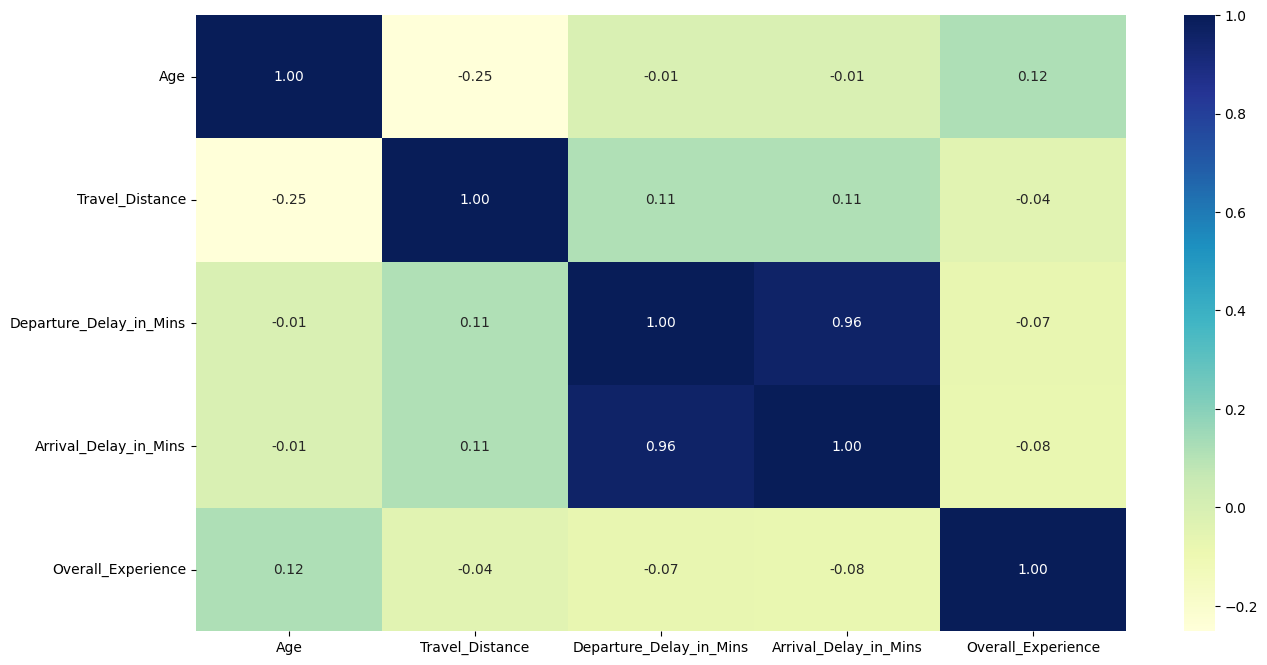

In [ ]:
# Plotting the correlation between numerical variables
plt.figure(figsize = (15, 8))
sns.heatmap(merged_df[numerical_cols].corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# 1. Define transformers (skip imputation since you've already handled it)

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Cleaned lists (important!)
numerical_cols_features = [col for col in numerical_cols if col != 'Overall_Experience']
categorical_cols_features = [col for col in categorical_cols if col != 'Overall_Experience']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols_features),
        ('cat', categorical_transformer, categorical_cols_features)
    ]
)

# Full model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split target and features
X = merged_df.drop(columns=['Overall_Experience'])
y = merged_df['Overall_Experience']

# Split data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Fit model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Travel_Distance',
                                                   'Departure_Delay_in_Mins',
                                                   'Arrival_Delay_in_Mins']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Customer_Type',
                                                   'Type_Travel',
                                                   'Travel_Class',
                                                   'Seat_Comfort', 'Seat_Class',
                                                   'Arrival_Time_Convenient',
                                                   'Catering',
                                                   'Platform_Location',
                                                   'Onboard_Wifi_Service',
                                                   'Onboard_Entertainment',
                                                   'Online_Support',
                                                   'Ease_of_Online_Booking',
                                                   'Onboard_Service', 'Legroom',
                                                   'Baggage_Handling',
                                                   'CheckIn_Service',
                                                   'Cleanliness',
                                                   'Online_Boarding'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())
print(y_train.value_counts())


(75503, 23)
(75503,)
['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins', 'Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding']
Overall_Experience
1    41274
0    34229
Name: count, dtype: int64


Accuracy: 0.9006675143038779

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      8557
           1       0.92      0.90      0.91     10319

    accuracy                           0.90     18876
   macro avg       0.90      0.90      0.90     18876
weighted avg       0.90      0.90      0.90     18876



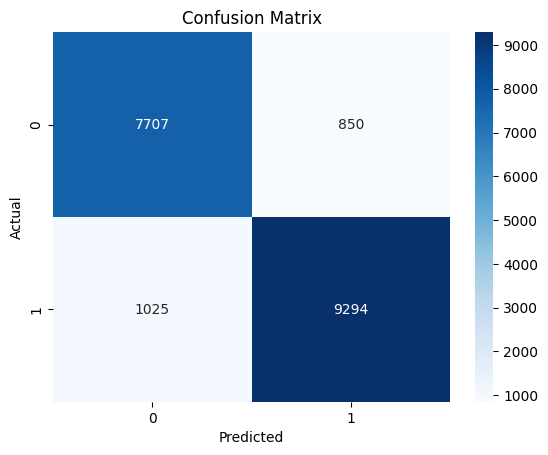

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))

# Optional: Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)

print("RF Accuracy:", accuracy_score(y_val, y_pred_rf))


RF Accuracy: 0.9503602458147913
